# Explore here

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

About Dataset

Kaggle Website Link:
https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data

Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [30]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
raw_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
raw_data.shape

(48895, 16)

In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [33]:
print(raw_data['host_id'].duplicated().sum())
print(raw_data['id'].duplicated().sum())

11438
0


There are hosts that are represented more than once in the data. is this a problem?

In [34]:
raw_data.drop(['id', 'name', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
raw_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [36]:
raw_data.shape

(48895, 11)

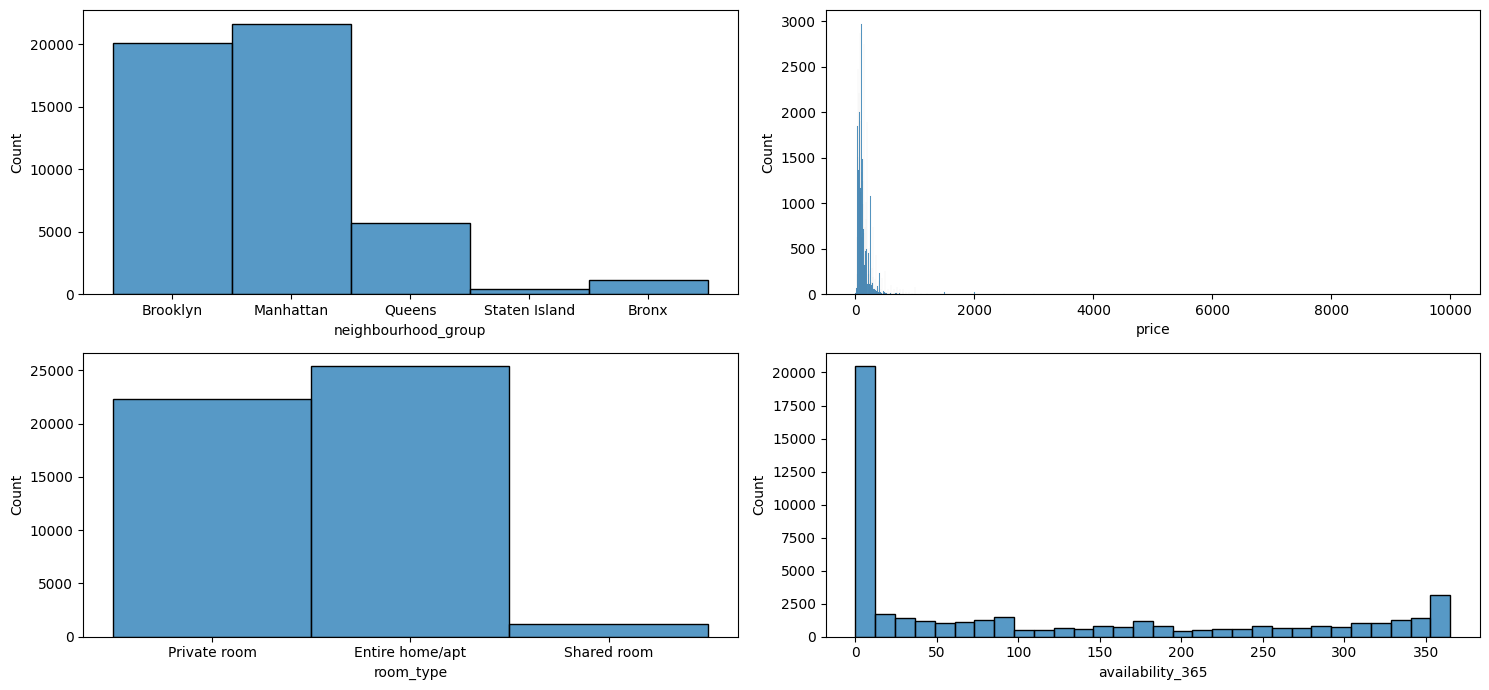

In [38]:
fig, axis = plt.subplots(2, 2, figsize=(15, 7))

sns.histplot(ax = axis[0,0], data=raw_data, x = 'neighbourhood_group')
sns.histplot(ax = axis[0,1], data=raw_data, x = 'price')
sns.histplot(ax = axis[1,0], data=raw_data, x = 'room_type')
sns.histplot(ax = axis[1,1], data=raw_data, x = 'availability_365')

plt.tight_layout()

plt.show()

In [39]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 4.1+ MB


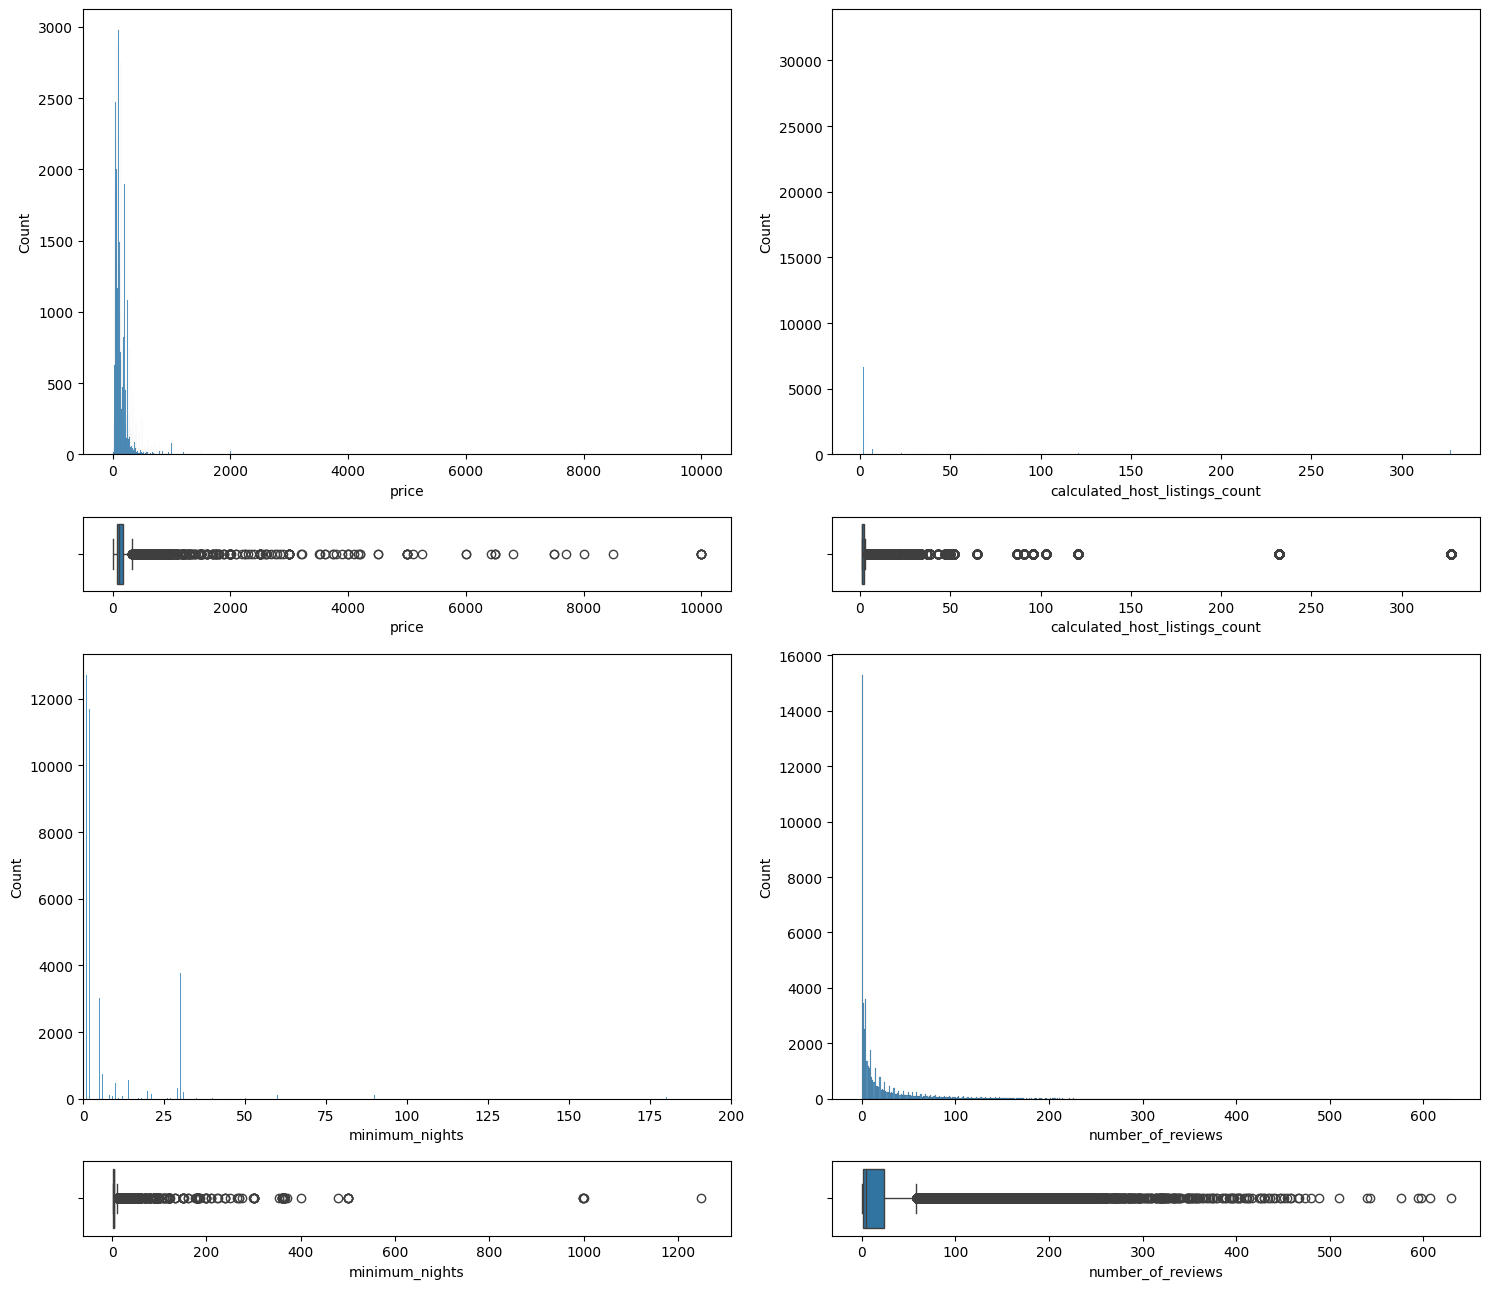

In [45]:
fig, axis = plt.subplots(4, 2, figsize=(15, 13), gridspec_kw = {'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data=raw_data, x = 'price')
sns.boxplot(ax = axis[1, 0], data=raw_data, x = 'price')

sns.histplot(ax = axis[0, 1], data=raw_data, x = 'calculated_host_listings_count')
sns.boxplot(ax = axis[1, 1], data=raw_data, x = 'calculated_host_listings_count')

sns.histplot(ax = axis[2, 0], data=raw_data, x = 'minimum_nights').set_xlim(0, 200)
sns.boxplot(ax = axis[3, 0], data=raw_data, x = 'minimum_nights')

sns.histplot(ax = axis[2, 1], data=raw_data, x = 'number_of_reviews')
sns.boxplot(ax = axis[3, 1], data=raw_data, x = 'number_of_reviews')

plt.tight_layout()

plt.show()

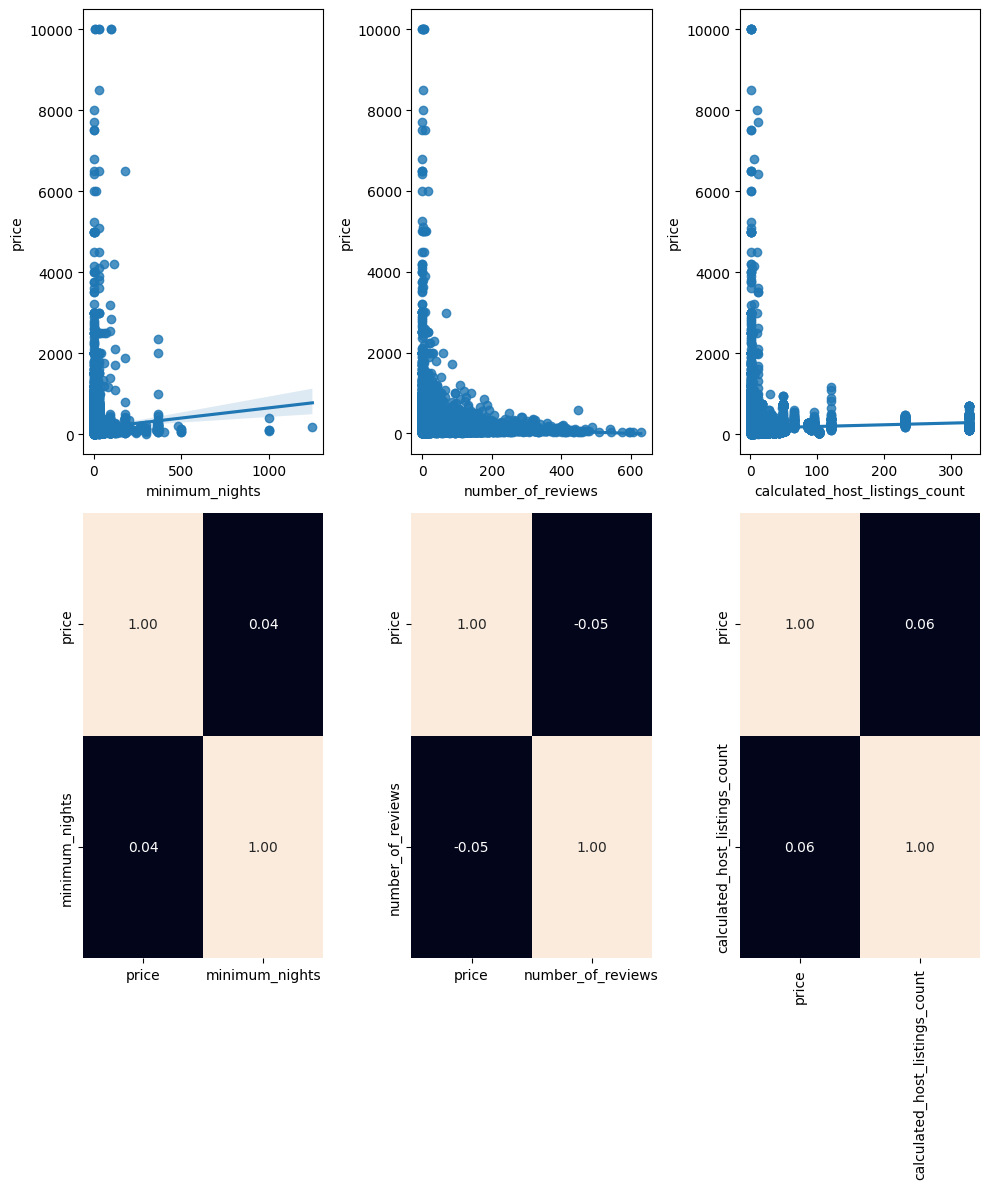

In [48]:
fit, axis = plt.subplots(2, 3, figsize = (10, 12))

sns.regplot(ax= axis[0,0], data= raw_data, x= 'minimum_nights', y= 'price')
sns.heatmap(raw_data[['price', 'minimum_nights']].corr(), annot= True, fmt = '.2f', ax= axis[1, 0], cbar = False)

sns.regplot(ax= axis[0,1], data= raw_data, x= 'number_of_reviews', y= 'price')
sns.heatmap(raw_data[['price', 'number_of_reviews']].corr(), annot= True, fmt = '.2f', ax= axis[1, 1], cbar = False)

sns.regplot(ax= axis[0,2], data= raw_data, x= 'calculated_host_listings_count', y= 'price')
sns.heatmap(raw_data[['price', 'calculated_host_listings_count']].corr(), annot= True, fmt = '.2f', ax= axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()